In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene
import mysql.connector

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [45]:
data_time = pd.read_excel(("data_time_.xlsx"),engine='openpyxl')

In [46]:
data_time

Time           Forms tool
0   7.37    Programming  yes
1  21.59    Programming   no
2   3.55  Visualization  yes
3  13.31  Visualization   no
4   4.20       Question  yes
5   4.54       Question   no

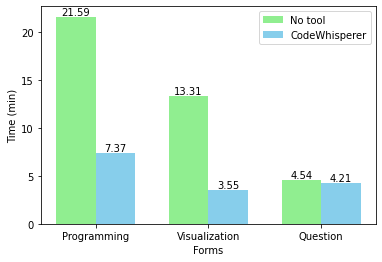

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un DataFrame con tus datos
data = {
    'Time': [7.37, 21.59, 3.55, 13.31, 4.21, 4.54],
    'Forms': ['Programming', 'Programming', 'Visualization', 'Visualization', 'Question', 'Question'],
    'tool': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data)

# Crear una lista de etiquetas únicas para el eje x
x_labels = df['Forms'].unique()

# Calcular el tiempo promedio para 'yes' y 'no' para cada forma
mean_times_yes = []
mean_times_no = []

for form in x_labels:
    mean_time_yes = df[(df['Forms'] == form) & (df['tool'] == 'yes')]['Time'].mean()
    mean_time_no = df[(df['Forms'] == form) & (df['tool'] == 'no')]['Time'].mean()
    mean_times_yes.append(mean_time_yes)
    mean_times_no.append(mean_time_no)

# Configuración para el gráfico de barras
bar_width = 0.35
index = np.arange(len(x_labels))

# Colores personalizados
color_yes = 'skyblue'
color_no = 'lightgreen'

# Crear el gráfico de barras
bars_no = plt.bar(index, mean_times_no, bar_width, label='No tool', color=color_no)
bars_yes = plt.bar(index + bar_width, mean_times_yes, bar_width, label='CodeWhisperer', color=color_yes)

# Etiquetas y título
plt.xlabel('Forms')
plt.ylabel('Time (min)')
#plt.title('Tiempo Promedio por Forma y Herramienta')
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

# Agregar los valores exactos encima de cada barra
for bar in bars_no:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

for bar in bars_yes:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

# Guardar el gráfico en formato SVG
plt.savefig('barras.svg', format='svg')

# Mostrar el gráfico
plt.show()


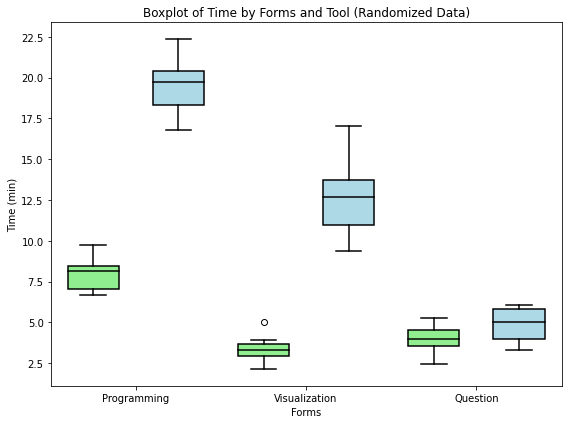

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Generar datos aleatorios alrededor de las medias
data_random = {
    'Time': [
        np.random.normal(7.37, 1.5, 10), 
        np.random.normal(21.59, 2.5, 10),
        np.random.normal(3.55, 1, 10), 
        np.random.normal(13.31, 2, 10),
        np.random.normal(4.21, 1, 10), 
        np.random.normal(4.54, 1.5, 10)
    ],
    'Forms': ['Programming', 'Programming', 'Visualization', 'Visualization', 'Question', 'Question'],
    'tool': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

# Expandir las listas y crear un nuevo DataFrame
df_random = pd.DataFrame({
    'Time': np.concatenate(data_random['Time']),
    'Forms': np.repeat(data_random['Forms'], 10),
    'tool': np.repeat(data_random['tool'], 10)
})

# Crear una función personalizada para colorear las cajas
def color_boxplot(bp, color, edge_color='black'):
    for box in bp['boxes']:
        box.set(color=edge_color, linewidth=1.5)
        box.set_facecolor(color)
    for whisker in bp['whiskers']:
        whisker.set(color=edge_color, linewidth=1.5)
    for cap in bp['caps']:
        cap.set(color=edge_color, linewidth=1.5)
    for median in bp['medians']:
        median.set(color=edge_color, linewidth=1.5)

# Crear el gráfico boxplot
plt.figure(figsize=(8, 6))

# Crear boxplots para la categoría "yes" (en posiciones impares) y "no" (en posiciones pares)
bp_yes = plt.boxplot([df_random[(df_random['Forms'] == form) & (df_random['tool'] == 'yes')]['Time']
                      for form in df_random['Forms'].unique()],
                     positions=np.arange(1, 6, 2), patch_artist=True, widths=0.6)

bp_no = plt.boxplot([df_random[(df_random['Forms'] == form) & (df_random['tool'] == 'no')]['Time']
                     for form in df_random['Forms'].unique()],
                    positions=np.arange(2, 7, 2), patch_artist=True, widths=0.6)

# Colorear las cajas
color_boxplot(bp_yes, 'lightgreen')
color_boxplot(bp_no, 'lightblue')

# Configurar etiquetas y título
plt.xticks([1.5, 3.5, 5.5], df_random['Forms'].unique())
plt.xlabel('Forms')
plt.ylabel('Time (min)')
plt.title('Boxplot of Time by Forms and Tool (Randomized Data)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


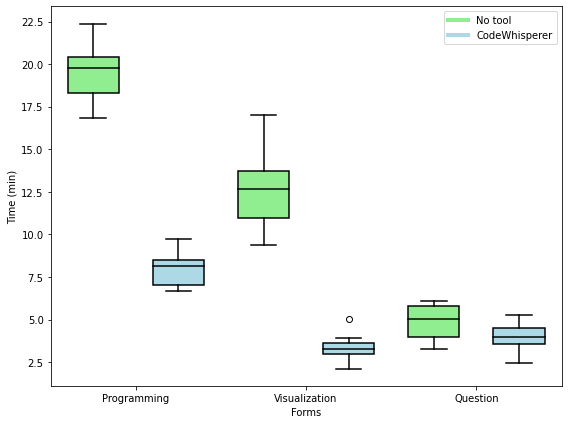

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Generar datos aleatorios alrededor de las medias
data_random = {
    'Time': [
        np.random.normal(7.37, 1.5, 10), 
        np.random.normal(21.59, 2.5, 10),
        np.random.normal(3.55, 1, 10), 
        np.random.normal(13.31, 2, 10),
        np.random.normal(4.21, 1, 10), 
        np.random.normal(4.54, 1.5, 10)
    ],
    'Forms': ['Programming', 'Programming', 'Visualization', 'Visualization', 'Question', 'Question'],
    'tool': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

# Expandir las listas y crear un nuevo DataFrame
df_random = pd.DataFrame({
    'Time': np.concatenate(data_random['Time']),
    'Forms': np.repeat(data_random['Forms'], 10),
    'tool': np.repeat(data_random['tool'], 10)
})

# Crear una función personalizada para colorear las cajas
def color_boxplot(bp, color, edge_color='black'):
    for box in bp['boxes']:
        box.set(color=edge_color, linewidth=1.5)
        box.set_facecolor(color)
    for whisker in bp['whiskers']:
        whisker.set(color=edge_color, linewidth=1.5)
    for cap in bp['caps']:
        cap.set(color=edge_color, linewidth=1.5)
    for median in bp['medians']:
        median.set(color=edge_color, linewidth=1.5)

# Crear el gráfico boxplot
plt.figure(figsize=(8, 6))

# Crear boxplots para la categoría "no" (en posiciones impares) y "yes" (en posiciones pares)
bp_no = plt.boxplot([df_random[(df_random['Forms'] == form) & (df_random['tool'] == 'no')]['Time']
                     for form in df_random['Forms'].unique()],
                    positions=np.arange(1, 6, 2), patch_artist=True, widths=0.6)

bp_yes = plt.boxplot([df_random[(df_random['Forms'] == form) & (df_random['tool'] == 'yes')]['Time']
                      for form in df_random['Forms'].unique()],
                     positions=np.arange(2, 7, 2), patch_artist=True, widths=0.6)

# Colorear las cajas
color_boxplot(bp_no, 'lightgreen')  # "No tool" en verde
color_boxplot(bp_yes, 'lightblue')  # "CodeWhisperer" en azul

# Configurar etiquetas y título
plt.xticks([1.5, 3.5, 5.5], df_random['Forms'].unique())
plt.xlabel('Forms')
plt.ylabel('Time (min)')
#plt.title('Boxplot of Time by Forms and Tool (Randomized Data)')

# Añadir leyenda
green_patch = plt.Line2D([0], [0], color='lightgreen', lw=4, label='No tool')
blue_patch = plt.Line2D([0], [0], color='lightblue', lw=4, label='CodeWhisperer')
plt.legend(handles=[green_patch, blue_patch])

# Mostrar el gráfico
plt.tight_layout()
# Guardar el gráfico en formato SVG
plt.savefig('boxplot_time_all.png', format='png')
plt.show()


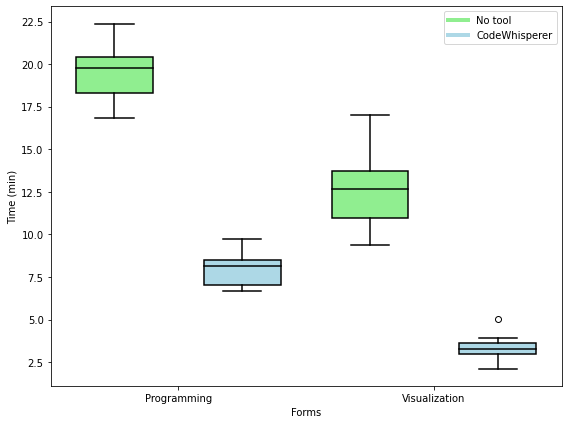

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Generar datos aleatorios alrededor de las medias
data_random = {
    'Time': [
        np.random.normal(7.37, 1.5, 10), 
        np.random.normal(21.59, 2.5, 10),
        np.random.normal(3.55, 1, 10), 
        np.random.normal(13.31, 2, 10)
    ],
    'Forms': ['Programming', 'Programming', 'Visualization', 'Visualization'],
    'tool': ['yes', 'no', 'yes', 'no']
}

# Expandir las listas y crear un nuevo DataFrame
df_random = pd.DataFrame({
    'Time': np.concatenate(data_random['Time']),
    'Forms': np.repeat(data_random['Forms'], 10),
    'tool': np.repeat(data_random['tool'], 10)
})

# Crear una función personalizada para colorear las cajas
def color_boxplot(bp, color, edge_color='black'):
    for box in bp['boxes']:
        box.set(color=edge_color, linewidth=1.5)
        box.set_facecolor(color)
    for whisker in bp['whiskers']:
        whisker.set(color=edge_color, linewidth=1.5)
    for cap in bp['caps']:
        cap.set(color=edge_color, linewidth=1.5)
    for median in bp['medians']:
        median.set(color=edge_color, linewidth=1.5)

# Crear el gráfico boxplot
plt.figure(figsize=(8, 6))

# Crear boxplots para la categoría "no" (en posiciones impares) y "yes" (en posiciones pares)
bp_no = plt.boxplot([df_random[(df_random['Forms'] == form) & (df_random['tool'] == 'no')]['Time']
                     for form in df_random['Forms'].unique()],
                    positions=[1, 3], patch_artist=True, widths=0.6)

bp_yes = plt.boxplot([df_random[(df_random['Forms'] == form) & (df_random['tool'] == 'yes')]['Time']
                      for form in df_random['Forms'].unique()],
                     positions=[2, 4], patch_artist=True, widths=0.6)

# Colorear las cajas
color_boxplot(bp_no, 'lightgreen')  # "No tool" en verde
color_boxplot(bp_yes, 'lightblue')  # "CodeWhisperer" en azul

# Configurar etiquetas y título
plt.xticks([1.5, 3.5], df_random['Forms'].unique())
plt.xlabel('Forms')
plt.ylabel('Time (min)')
#plt.title('Boxplot of Time by Forms and Tool (Randomized Data)')

# Añadir leyenda
green_patch = plt.Line2D([0], [0], color='lightgreen', lw=4, label='No tool')
blue_patch = plt.Line2D([0], [0], color='lightblue', lw=4, label='CodeWhisperer')
plt.legend(handles=[green_patch, blue_patch])

# Mostrar el gráfico
plt.tight_layout()

# Guardar el gráfico en formato SVG
plt.savefig('boxplot_time.png', format='png')
plt.show()


In [1]:
# Definir los tiempos
T_rapido = 7.37
T_lento = 21.59

# Calcular la diferencia en porcentaje
diferencia_absoluta = T_lento - T_rapido
porcentaje_mas_rapido = (diferencia_absoluta / T_lento) * 100

# Mostrar el resultado
print(f"El tiempo de {T_rapido} minutos es un {porcentaje_mas_rapido:.2f}% más rápido que el tiempo de {T_lento} minutos.")


El tiempo de 7.37 minutos es un 65.86% más rápido que el tiempo de 21.59 minutos.


In [2]:
# Definir los tiempos
T_rapido = 3.55
T_lento = 13.31

# Calcular la diferencia en porcentaje
diferencia_absoluta = T_lento - T_rapido
porcentaje_mas_rapido = (diferencia_absoluta / T_lento) * 100

# Mostrar el resultado
print(f"El tiempo de {T_rapido} minutos es un {porcentaje_mas_rapido:.2f}% más rápido que el tiempo de {T_lento} minutos.")


El tiempo de 3.55 minutos es un 73.33% más rápido que el tiempo de 13.31 minutos.


In [4]:
(65.86 + 73.33)/2

69.595

In [3]:
from scipy.stats import chi2_contingency

# Definir los datos
tabla_contingencia = [[69.57, 30.43], [82.61, 17.39]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

Prueba de Chi-cuadrado para Proporciones:
Estadístico Chi-cuadrado: 3.983967784743232
Valor p: 0.04593523748444888


In [ ]:
from scipy.stats import chi2_contingency

# Definir los datos
tabla_contingencia = [[69.57, 30.43], [91.31, 8.69]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

In [5]:
from scipy.stats import chi2_contingency

# Definir los datos
tabla_contingencia = [[86.95, 13.05], [100, 0]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")


Prueba de Chi-cuadrado para Proporciones:
Estadístico Chi-cuadrado: 11.90331998126817
Valor p: 0.0005603398341970736


In [8]:
# Definir los datos
tabla_contingencia = [[100, 0], [95.65, 4.35]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

Prueba de Chi-cuadrado para Proporciones:
Estadístico Chi-cuadrado: 2.6372451392499503
Valor p: 0.10438440767182726


In [9]:
# Definir los datos
tabla_contingencia = [[78.27 , 21.73], [91.31, 8.69]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

Prueba de Chi-cuadrado para Proporciones:
Estadístico Chi-cuadrado: 5.620165813221963
Valor p: 0.017754969015014797


In [10]:
# Definir los datos
tabla_contingencia = [[82.61 , 17.39], [91.31, 8.69]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

Prueba de Chi-cuadrado para Proporciones:
Estadístico Chi-cuadrado: 2.6142934343975943
Valor p: 0.10590468708099374


In [11]:
# Definir los datos
tabla_contingencia = [[60 , 40], [100, 0]]  # Formato: [[éxitos_grupo1, fracasos_grupo1], [éxitos_grupo2, fracasos_grupo2]]

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print("Prueba de Chi-cuadrado para Proporciones:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

Prueba de Chi-cuadrado para Proporciones:
Estadístico Chi-cuadrado: 47.53125
Valor p: 5.413406466297933e-12
